This is a script for analysing the effects of removing NWP visibility forecasts as inputs on test RMSE. Please refer to Section 3.2.3 for more information. This script produces Figure 4.4 in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path = ROOT+"trained_models/lead_time_continuous/"

In [3]:
# Results df for random forest regression (with NWP visibility forecasts as inputs)
df_test_result = pd.read_csv(result_path + "results_giant_20_300.csv")
test_error_rf = df_test_result['error_rf']

# Results df for random forest regression (without NWP visibility forecasts as inputs)
df_test_result_no_vis = pd.read_csv(result_path + "results_giant_20_300_no_vis.csv")
test_error_rf_no_vis = df_test_result_no_vis['error_rf']

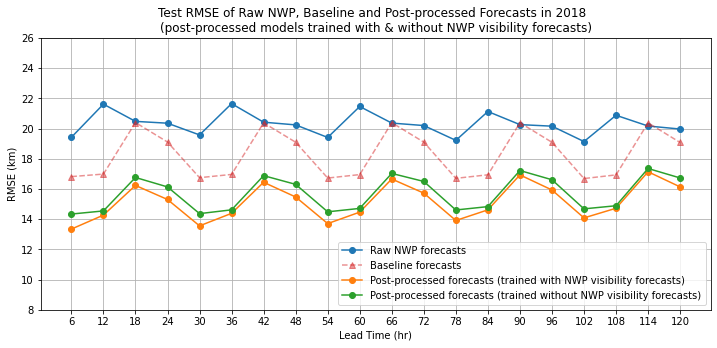

In [7]:
## Plot test RMSE by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_rf = []
rmse_rf_no_vis = []
rmse_forecast = []
rmse_baseline = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[df_test_result['lead_hr']==l]**2)))
    rmse_rf_no_vis.append(np.sqrt(np.mean(test_error_rf_no_vis[df_test_result_no_vis['lead_hr']==l]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    rmse_baseline.append(np.sqrt(np.mean(df_test_result[df_test_result['lead_hr']==l]['error_baseline']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_no_vis = np.array(rmse_rf_no_vis)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_baseline, '^--', label='Baseline forecasts', c='tab:red', alpha=0.5)
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (trained with NWP visibility forecasts)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_no_vis, 'o-', label='Post-processed forecasts (trained without NWP visibility forecasts)', c='tab:green')
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP, Baseline and Post-processed Forecasts in 2018  \n(post-processed models trained with & without NWP visibility forecasts)")
ax1.legend(loc='lower right')